# <a id="id1"><center>MODULE 4 - ALGO TRADING USING CLASSIFICATION</center></a>

## <a id="id1" style="color:#FF0000;">Trade Call Prediction using Classification</a>
In this module, we'd be covering the concept of classification and utilize our skills to solve the following queries – (Stock Price = Close Price)

## <a id="id1">PROBLEM STATEMENT 4.1</a>
Import the csv file of the stock which contained the Bollinger columns as well.

> Create a new column 'Call' , whose entries are - 
- 'Buy' if the stock price is below the lower Bollinger band 
- 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
- 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
- 'Short' if the stock price is above the upper Bollinger band 

> Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

> Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

Importing the libraries we are going to use

In [1]:
import pandas as pd

### Problem Statement 4.1a Create new column "Call"
Import the csv file of the stock which contained the Bollinger columns as well.

Create a new column 'Call' , whose entries are - 
- 'Buy' if the stock price is below the lower Bollinger band 
- 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
- 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
- 'Short' if the stock price is above the upper Bollinger band 

In [2]:
stock_data = pd.read_csv("./week2.csv",index_col=0)

#### We are setting the Date as Index

In [3]:
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data = stock_data.set_index('Date')

In [5]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,RAYMOND,EQ,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96,2017,5,772.800000,0.000000,Slight or No change
2017-05-16,RAYMOND,EQ,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77,2017,5,781.803741,1.578675,Positive
2017-05-17,RAYMOND,EQ,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34,2017,5,782.447781,-0.171975,Slight or No change
2017-05-18,RAYMOND,EQ,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83,2017,5,776.867021,-4.683213,Among top losers
2017-05-19,RAYMOND,EQ,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52,2017,5,765.239492,-3.192985,Among top losers


####  Adding Bollinger Bands Columns
First,We are finding the Mean and std for the rolling 14 days

In [6]:
rol_avg = stock_data['Close Price'].rolling(window=14).mean()
rol_std = stock_data['Close Price'].rolling(window=14).std()

In [8]:
rol_avg

Date
2017-05-15           NaN
2017-05-16           NaN
2017-05-17           NaN
2017-05-18           NaN
2017-05-19           NaN
                 ...    
2019-05-07    773.471429
2019-05-08    775.110714
2019-05-09    775.725000
2019-05-10    776.385714
2019-05-13    776.250000
Name: Close Price, Length: 494, dtype: float64

In [9]:
rol_std

Date
2017-05-15          NaN
2017-05-16          NaN
2017-05-17          NaN
2017-05-18          NaN
2017-05-19          NaN
                ...    
2019-05-07    21.746306
2019-05-08    23.414248
2019-05-09    24.126213
2019-05-10    24.815902
2019-05-13    24.792438
Name: Close Price, Length: 494, dtype: float64

###### Now we are creating the 3 different columns named lower,upper and average(middle) and assigning the values to each row

In [11]:
stock_data['lower'] = rol_avg-2*rol_std
stock_data['avg'] = rol_avg
stock_data['upper'] = rol_avg+2*rol_std

In [12]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend,lower,avg,upper
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,RAYMOND,EQ,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,...,55467,18.96,2017,5,772.800000,0.000000,Slight or No change,NaN,NaN,NaN
2017-05-16,RAYMOND,EQ,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,...,179377,21.77,2017,5,781.803741,1.578675,Positive,NaN,NaN,NaN
2017-05-17,RAYMOND,EQ,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,...,127637,21.34,2017,5,782.447781,-0.171975,Slight or No change,NaN,NaN,NaN
2017-05-18,RAYMOND,EQ,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,...,92200,28.83,2017,5,776.867021,-4.683213,Among top losers,NaN,NaN,NaN
2017-05-19,RAYMOND,EQ,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,...,137648,24.52,2017,5,765.239492,-3.192985,Among top losers,NaN,NaN,NaN


##### We are having NaN values in the starting 14 rows for lower,upper and avg(middle) bands so we have to do either filling or droping the values of the first 14 rows

In [13]:
stock_data.dropna(inplace=True)

###### So here we are droping the values of first 14 rows of a columns name called lower,upper and avg(middle)

In [14]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend,lower,avg,upper
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,RAYMOND,EQ,694.20,696.0,708.8,674.1,693.50,693.90,697.14,378903,...,51076,13.48,2017,6,711.343029,-0.043215,Slight or No change,640.975166,719.125000,797.274834
2017-06-02,RAYMOND,EQ,693.90,707.8,714.5,697.4,702.10,702.65,706.31,426635,...,64055,15.01,2017,6,710.987062,1.260989,Positive,642.028958,714.114286,786.199614
2017-06-05,RAYMOND,EQ,702.65,705.1,757.0,705.0,749.45,751.25,739.27,1863074,...,201205,10.80,2017,6,717.094656,6.916673,Among top gainers,648.067896,711.703571,775.339247
2017-06-06,RAYMOND,EQ,751.25,756.0,759.5,721.3,729.15,728.45,741.59,1165454,...,171125,14.68,2017,6,718.078800,-3.034942,Among top losers,658.000115,707.760714,757.521313
2017-06-07,RAYMOND,EQ,728.45,730.0,741.8,721.0,725.00,729.05,731.45,530090,...,202308,38.16,2017,6,718.494879,0.082367,Slight or No change,660.265502,706.482143,752.698783


#### Create a new column `Call`

whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band

In [16]:
def classifying_call(close_price,lower_band,avg_band,upper_band):
    if close_price <= lower_band:
        return 'Buy'
    if (close_price > lower_band) and (close_price <= avg_band):
        return 'Hold Buy/Liquidate Short'
    elif (close_price > avg_band) and (close_price <= upper_band):
        return 'Hold Short/Liquidate Buy'
    elif close_price > upper_band:
        return 'Short'

In [17]:
stock_data["Call"] = stock_data.apply(lambda record : classifying_call(record['Close Price'], record['lower'], record['avg'], record['upper']), axis = 1)

In [18]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend,lower,avg,upper,Call
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,RAYMOND,EQ,694.20,696.0,708.8,674.1,693.50,693.90,697.14,378903,...,13.48,2017,6,711.343029,-0.043215,Slight or No change,640.975166,719.125000,797.274834,Hold Buy/Liquidate Short
2017-06-02,RAYMOND,EQ,693.90,707.8,714.5,697.4,702.10,702.65,706.31,426635,...,15.01,2017,6,710.987062,1.260989,Positive,642.028958,714.114286,786.199614,Hold Buy/Liquidate Short
2017-06-05,RAYMOND,EQ,702.65,705.1,757.0,705.0,749.45,751.25,739.27,1863074,...,10.80,2017,6,717.094656,6.916673,Among top gainers,648.067896,711.703571,775.339247,Hold Short/Liquidate Buy
2017-06-06,RAYMOND,EQ,751.25,756.0,759.5,721.3,729.15,728.45,741.59,1165454,...,14.68,2017,6,718.078800,-3.034942,Among top losers,658.000115,707.760714,757.521313,Hold Short/Liquidate Buy
2017-06-07,RAYMOND,EQ,728.45,730.0,741.8,721.0,725.00,729.05,731.45,530090,...,38.16,2017,6,718.494879,0.082367,Slight or No change,660.265502,706.482143,752.698783,Hold Short/Liquidate Buy


Checking the labels which are present in the `Call` Column

In [19]:
stock_data.Call.unique()

array(['Hold Buy/Liquidate Short', 'Hold Short/Liquidate Buy', 'Buy',
       'Short'], dtype=object)

Checking the counts of the each label in a `Call` Column.

In [20]:
stock_data.Call.value_counts()

Hold Buy/Liquidate Short    216
Hold Short/Liquidate Buy    211
Buy                          30
Short                        24
Name: Call, dtype: int64

Saving the CSV file for the further usage

In [21]:
stock_data.to_csv('./week4.csv')

### Problem Statement 4.1b Training Different Classification models

Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

#### Training Testing Split

In [22]:
Input = stock_data[['lower','avg','upper','Close Price']]
Input.head()

,lower,avg,upper,Close Price
Date,,,,
2017-06-01,640.975166,719.125000,797.274834,693.90
2017-06-02,642.028958,714.114286,786.199614,702.65
2017-06-05,648.067896,711.703571,775.339247,751.25
2017-06-06,658.000115,707.760714,757.521313,728.45
2017-06-07,660.265502,706.482143,752.698783,729.05


Here,We are changing the labels into the numbered_label of `Call` Column for better understanding of the model

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(stock_data.Call.ravel())
Output = pd.DataFrame(numbered_label)
Output.head()

,0
0,1
1,1
2,2
3,2
4,2


We are spliting the training dataset as 80% and testing datset as 20%

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(Input, Output, test_size=0.2)

In [25]:
y_train = y_train.values.reshape(len(y_train))
y_test = y_test.values.reshape(len(y_test))

Checking whether the `Call` column values(Strings)  in Numbered_Label

In [26]:
y_train

array([1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1,
       3, 3, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 3, 1, 3, 2, 0,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 2, 2, 2, 1,
       3, 1, 2, 1, 2, 3, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 3, 2, 1, 2, 2, 0, 3, 1, 1, 2, 3, 1, 2, 1, 1, 2,
       1, 3, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       0, 2, 1, 0, 2, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2,

In [27]:
y_test

array([0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 3, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 3, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 2, 2, 1])

In [29]:
X_train.head()

,lower,avg,upper,Close Price
Date,,,,
2018-10-08,602.478395,709.846429,817.214462,632.90
2019-03-06,645.443898,736.871429,828.298959,817.45
2019-01-21,802.857889,812.735714,822.613539,805.95
2018-01-10,1002.734268,1067.875000,1133.015732,1114.00
2018-11-09,593.636018,713.996429,834.356839,766.05


In [30]:
X_test.head()

,lower,avg,upper,Close Price
Date,,,,
2019-04-22,756.330589,793.278571,830.226554,755.40
2018-04-30,1009.764441,1070.825000,1131.885559,1112.05
2018-08-06,782.976178,823.267857,863.559536,812.50
2018-04-19,906.962754,1013.864286,1120.765818,1053.35
2018-10-26,592.890503,643.228571,693.566640,692.20


#### Training Different models
#### Different Classification Algorithm
1. Naive bayes (Linear Classifier)
2. Logistic Regression (Linear Classifier)
3. Support Vector Machine
4. K-NEAREST NEIGHBOUR (KNN)
5. Random Forest

We are creating an new dataframe to store the training and testing accuracy of the different classifiers

In [31]:
classifers_train_test = pd.DataFrame(columns=["Classifier","Train_AUC", "Test_AUC"])

In [32]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC


### <i>Naive bayes</i>

In [33]:
from sklearn.naive_bayes import GaussianNB
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
training_accuracy = gaussian_classifier.score(X_train, y_train).round(2)
training_accuracy

0.49

In [36]:
testing_accuracy = gaussian_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.48

In [37]:
classifers_train_test.loc[0] = ["Naive Bayes", training_accuracy, testing_accuracy]

In [38]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC
0,Naive Bayes,0.49,0.48


### <i>Logistic Regression(Linear Classifier)</i>

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000,class_weight='balanced', multi_class="ovr", solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
training_accuracy = lr.score(X_train, y_train).round(2)
training_accuracy

0.97

In [41]:
testing_accuracy = lr.score(X_test, y_test).round(2)
testing_accuracy

0.98

In [42]:
classifers_train_test.loc[1] = ["Logistic Regression", training_accuracy, testing_accuracy]

In [43]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC
0,Naive Bayes,0.49,0.48
1,Logistic Regression,0.97,0.98


### <i>Support Vector Machine<i>

In [44]:
from sklearn.svm import SVC
svm_classifier = SVC(verbose=True, gamma='scale',class_weight='balanced')
svm_classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [45]:
training_accuracy = svm_classifier.score(X_train, y_train).round(2)
training_accuracy

0.63

In [46]:
testing_accuracy = svm_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.59

In [47]:
classifers_train_test.loc[2] = ["SVM", training_accuracy, testing_accuracy]

In [48]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC
0,Naive Bayes,0.49,0.48
1,Logistic Regression,0.97,0.98
2,SVM,0.63,0.59


In [49]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC
0,Naive Bayes,0.49,0.48
1,Logistic Regression,0.97,0.98
2,SVM,0.63,0.59


### <i>K-Nearest Neighbour (KNN)</i>

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
training_accuracy = knn_classifier.score(X_train, y_train).round(2)
training_accuracy

0.9

In [52]:
testing_accuracy = knn_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.78

In [53]:
classifers_train_test.loc[3] = ["KNN", training_accuracy, testing_accuracy]

In [54]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC
0,Naive Bayes,0.49,0.48
1,Logistic Regression,0.97,0.98
2,SVM,0.63,0.59
3,KNN,0.90,0.78


### <i>Random Forest Classifier</i>

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth =3, n_estimators = 10,class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
training_accuracy = rf_classifier.score(X_train, y_train).round(2)
training_accuracy

0.67

In [57]:
testing_accuracy = rf_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.53

In [58]:
classifers_train_test.loc[4] = ["Random Forest", training_accuracy, testing_accuracy]

#### Accuracy of all models

In [59]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC
0,Naive Bayes,0.49,0.48
1,Logistic Regression,0.97,0.98
2,SVM,0.63,0.59
3,KNN,0.90,0.78
4,Random Forest,0.67,0.53


#### Logistic Regression gives the best accuracy and performance among all five models.
#### Naive Bayes Classifier gives worst accuracy and performance.

### Problem Statement 4.1c Predicting Calls on another stock data
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [60]:
another_data = pd.read_csv("./LT.csv")
another_data.Date = pd.to_datetime(another_data.Date)
another_data.set_index("Date", inplace=True)
another_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


####  Adding Bollinger Bands Columns
First,We are finding the Mean and std for the rolling 14 days

In [61]:
rolavg = another_data['Close Price'].rolling(window=14).mean()
rolstd = another_data['Close Price'].rolling(window=14).std()

###### Now we are creating the 3 different columns named lower,upper and average(middle) and assigning the values to each row

In [62]:
another_data['lower'] = rolavg-2*rolstd
another_data['avg'] = rolavg
another_data['upper'] = rolavg+2*rolstd

In [63]:
another_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower,avg,upper
Date,,,,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,NaN,NaN,NaN
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,NaN,NaN,NaN
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,NaN,NaN,NaN
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,NaN,NaN,NaN
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,NaN,NaN,NaN


##### We are having NaN values in the starting 14 rows for lower,upper and avg(middle) bands so we have to do either filling or droping the values of the first 14 rows

In [64]:
another_data.dropna(inplace=True)
another_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower,avg,upper
Date,,,,,,,,,,,,,,,,,
2017-06-01,LT,EQ,1760.70,1760.0,1798.00,1748.00,1792.10,1792.80,1772.42,1932123,3.424526e+09,72013,957738,49.57,1693.461335,1751.625000,1809.788665
2017-06-02,LT,EQ,1792.80,1800.0,1805.00,1778.10,1784.85,1784.00,1787.39,950214,1.698405e+09,45529,436632,45.95,1694.253263,1754.596429,1814.939594
2017-06-05,LT,EQ,1784.00,1795.0,1809.40,1783.50,1804.35,1804.90,1802.25,1270946,2.290566e+09,62246,690909,54.36,1693.837723,1759.182143,1824.526563
2017-06-06,LT,EQ,1804.90,1807.7,1808.05,1772.15,1773.00,1775.15,1783.32,954046,1.701372e+09,50045,494546,51.84,1694.744536,1760.589286,1826.434035
2017-06-07,LT,EQ,1775.15,1774.0,1794.50,1773.00,1786.30,1788.60,1784.63,885027,1.579445e+09,53026,466130,52.67,1701.764977,1765.303571,1828.842166


#### Adding Column "Call"

In [65]:
another_data["Call"] = another_data.apply(lambda record : classifying_call(record['Close Price'], record['lower'], record['avg'], record['upper']), axis = 1) 

Checking the labels which are present in the `Call` Column

In [66]:
another_data.Call.unique()

array(['Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short', 'Buy',
       'Short'], dtype=object)

Checking the counts of the each label in a `Call` Column.

In [67]:
another_data.Call.value_counts()

Hold Buy/Liquidate Short    225
Hold Short/Liquidate Buy    206
Buy                          26
Short                        24
Name: Call, dtype: int64

#### Predicting Calls

In [68]:
Input = another_data[['lower','avg','upper','Close Price']]
Input.tail()

,lower,avg,upper,Close Price
Date,,,,
2019-05-07,1343.064459,1359.460714,1375.856970,1366.60
2019-05-08,1343.037397,1359.421429,1375.805460,1360.35
2019-05-09,1342.982196,1359.389286,1375.796375,1356.45
2019-05-10,1347.049497,1357.539286,1368.029074,1355.50
2019-05-13,1330.888535,1354.464286,1378.040037,1317.65


Here,We are changing the labels into the numbered_label of `Call` Column for better understanding of the model

In [69]:
label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(another_data.Call.ravel())
Output = pd.DataFrame(numbered_label)
Output.tail()

,0
476,2
477,2
478,1
479,1
480,0


#### Predicted Calls using already defined Logistic Regression model

In [70]:
output_pred = lr.predict(Input)

#### Accuracy of LR model

In [71]:
lr.score(Input, Output)

0.9272349272349273

#### Adding Predicted Call in another_data

In [72]:
another_data["Predicted Call"] = label_encoder.inverse_transform(output_pred)
another_data.tail()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower,avg,upper,Call,Predicted Call
Date,,,,,,,,,,,,,,,,,,,
2019-05-07,LT,EQ,1352.70,1357.40,1374.35,1350.0,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55,1343.064459,1359.460714,1375.856970,Hold Short/Liquidate Buy,Hold Buy/Liquidate Short
2019-05-08,LT,EQ,1366.60,1363.90,1371.00,1355.0,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87,1343.037397,1359.421429,1375.805460,Hold Short/Liquidate Buy,Hold Buy/Liquidate Short
2019-05-09,LT,EQ,1360.35,1357.00,1368.80,1337.6,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30,1342.982196,1359.389286,1375.796375,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
2019-05-10,LT,EQ,1356.45,1359.65,1362.50,1345.1,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89,1347.049497,1357.539286,1368.029074,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
2019-05-13,LT,EQ,1355.50,1345.00,1355.00,1312.0,1318.20,1317.65,1326.93,3422913,4.541968e+09,126334,1686523,49.27,1330.888535,1354.464286,1378.040037,Buy,Buy


## <a id="id2">PROBLEM STATEMENT 4.2</a>
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier. 

> Import the stock data file of your choice

> Define 4 new columns , whose values are: 
- % change between Open and Close price for the day 
- % change between Low and High price for the day 
- 5 day rolling mean of the day to day % change in Close Price 
- 5 day rolling std of the day to day % change in Close Price 

> Create a new column 'Action' whose values are: 
- 1 if next day's price(Close) is greater than present day's. 
- (-1) if next day's price(Close) is less than present day's. 
- i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
- i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

> Construct a classification model with the 4 new inputs and 'Action' as target
> Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

<img src="https://www.aspiration.link/machine-learning/internship/images/14.png" alt="Drawing" style="width: 500px;" align="left"/>

###### Importing Stock data of LT 

In [73]:
# Importing Stock data of LT 
stock_data = pd.read_csv("./LT.csv")
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.set_index("Date", inplace=True)
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


In [74]:
stock_data.shape

(494, 14)

#### Adding Column for `% change between Open and Close price for the day`

In [75]:
stock_data['OC_Pct_Change'] = (stock_data['Close Price']-stock_data['Open Price'])/stock_data['Close Price']*100.0

In [76]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_Pct_Change
Date,,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,-0.355831
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,-0.361923
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,0.657951
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,-0.989783
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,-0.258038


#### Adding Column for `% change between Low and High price for the day `

In [77]:
stock_data['LH_Pct_Change'] = (stock_data['High Price']-stock_data['Low Price'])/stock_data['High Price']*100.0

In [78]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_Pct_Change,LH_Pct_Change
Date,,,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,-0.355831,0.859239
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,-0.361923,1.184041
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,0.657951,1.899093
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,-0.989783,1.925604
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,-0.258038,2.102076


#### Adding Column for `5 day rolling mean of the day to day % change in Close Price`

In [79]:
stock_data['Mean_rolling'] = stock_data['Close Price'].rolling(window=5).mean() / stock_data.OC_Pct_Change

In [80]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_Pct_Change,LH_Pct_Change,Mean_rolling
Date,,,,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,-0.355831,0.859239,NaN
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,-0.361923,1.184041,NaN
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,0.657951,1.899093,NaN
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,-0.989783,1.925604,NaN
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,-0.258038,2.102076,-6732.100645


#### Adding Column for `5 day rolling std of the day to day % change in Close Price`

In [81]:
stock_data['Std_rolling'] = stock_data['Close Price'].rolling(window=5).std() / stock_data.OC_Pct_Change

In [82]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_Pct_Change,LH_Pct_Change,Mean_rolling,Std_rolling
Date,,,,,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,-0.355831,0.859239,NaN,NaN
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,-0.361923,1.184041,NaN,NaN
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,0.657951,1.899093,NaN,NaN
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,-0.989783,1.925604,NaN,NaN
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,-0.258038,2.102076,-6732.100645,-52.907173


In [83]:
stock_data.shape

(494, 18)

In [84]:
stock_data['Action'] = (stock_data['Close Price'].shift(-1) > stock_data['Close Price']).replace([True, False],[1,-1])[:-1]

Replacing the Infinity or minus Infinity Values with NaN values

In [85]:
stock_data=stock_data.replace([pd.np.inf, -pd.np.inf], pd.np.nan)

C:\Users\Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


Droping NaNs

In [86]:
stock_data.dropna(inplace=True)

In [87]:
stock_data.shape

(488, 19)

#### Traning and Testing Split
Construct a classification model with the 4 new inputs and 'Action' as target

In [88]:
Input = stock_data[['OC_Pct_Change', 'LH_Pct_Change', 'Mean_rolling', 'Std_rolling']]
Input.head()

,OC_Pct_Change,LH_Pct_Change,Mean_rolling,Std_rolling
Date,,,,
2017-05-19,-0.258038,2.102076,-6732.100645,-52.907173
2017-05-22,1.081652,1.705514,1607.772373,14.012875
2017-05-23,-0.818613,2.124766,-2124.399084,-18.517219
2017-05-24,-3.422482,4.513632,-503.979259,-7.484361
2017-05-25,4.344631,4.676056,399.138643,7.392993


##### Need to Normalize Input Data

In [89]:
from sklearn.preprocessing import MinMaxScaler
Input = MinMaxScaler().fit_transform(Input)

In [91]:
Input

array([[0.29527119, 0.21307174, 0.50671218, 0.38816003],
       [0.41187766, 0.16150486, 0.5173087 , 0.39525862],
       [0.24647887, 0.21602225, 0.51256666, 0.39180797],
       ...,
       [0.29501669, 0.09148321, 0.50864231, 0.39163388],
       [0.31420161, 0.23612599, 0.47265064, 0.37929364],
       [0.29108268, 0.10579133, 0.50962877, 0.3919087 ]])

In [92]:
Output = stock_data.Action
Output.head()

Date
2017-05-19    1.0
2017-05-22   -1.0
2017-05-23   -1.0
2017-05-24    1.0
2017-05-25    1.0
Name: Action, dtype: float64

In [93]:
X_train, X_test,y_train, y_test = train_test_split(Input, Output, test_size=0.2)

In [94]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [95]:
print(y_train)
print('\n')
print(y_test)

[ 1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.
  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.
  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1.
  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.
 -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.
 -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.
  1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.
 -1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.
 -1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1

#### Classification Model : Random Forest

In [96]:
rf_classifier = RandomForestClassifier(max_depth = 10, n_estimators =10,class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Accuracy

In [97]:
rf_classifier.score(X_train, y_train)

0.9128205128205128

In [98]:
rf_classifier.score(Input, Output)

0.8135245901639344

#### Net Cumulative Returns (in %)
plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [99]:
stock_data['Net_cum_returns'] = ((stock_data['Open Price']-stock_data['Close Price'])/stock_data['Open Price']*100).cumsum()

In [100]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_Pct_Change,LH_Pct_Change,Mean_rolling,Std_rolling,Action,Net_cum_returns
Date,,,,,,,,,,,,,,,,,,,,
2017-05-19,LT,EQ,1722.60,1729.0,1734.0,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,-0.258038,2.102076,-6732.100645,-52.907173,1.0,0.257374
2017-05-22,LT,EQ,1724.55,1733.0,1759.0,1729.00,1753.00,1751.95,1749.85,1892816,3.312148e+09,81450,1222100,64.57,1.081652,1.705514,1607.772373,14.012875,-1.0,-0.836105
2017-05-23,LT,EQ,1751.95,1755.0,1764.9,1727.40,1735.50,1740.75,1744.75,975870,1.702648e+09,54639,431247,44.19,-0.818613,2.124766,-2124.399084,-18.517219,-1.0,-0.024139
2017-05-24,LT,EQ,1740.75,1742.1,1756.9,1677.60,1689.45,1684.45,1721.17,1448713,2.493487e+09,50761,754200,52.06,-3.422482,4.513632,-503.979259,-7.484361,1.0,3.285085
2017-05-25,LT,EQ,1684.45,1692.0,1775.0,1692.00,1765.00,1768.85,1753.44,3603181,6.317948e+09,95146,2346405,65.12,4.344631,4.676056,399.138643,7.392993,1.0,-1.256877


In [101]:
import matplotlib.pyplot as plt

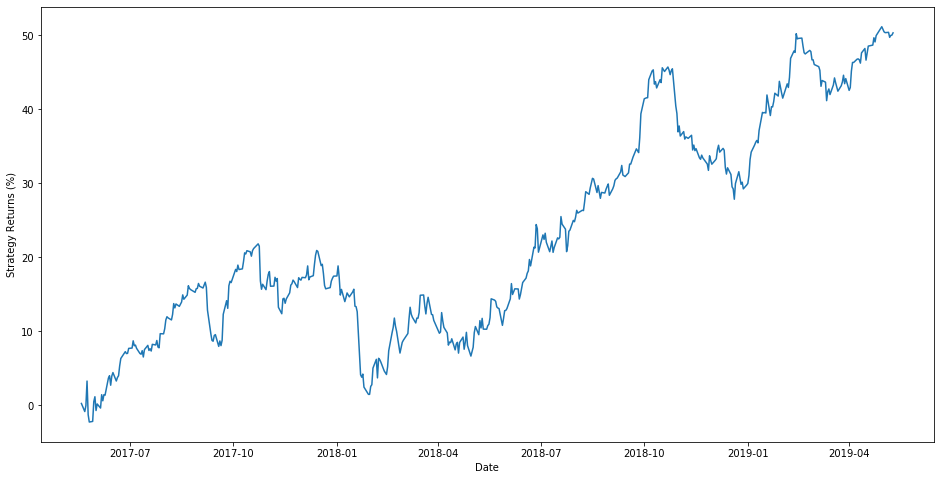

In [102]:
plt.figure(figsize=(16,8))
plt.plot(stock_data.index, stock_data['Net_cum_returns'])
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()